In [1]:
import pandas as pd
import numpy as np
import umap
import plotly.graph_objects as go
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\miyazakiyuma\.pyenv\pyenv-win\versions\3.8.7\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# action vectors generated from ALL-2020 EventStream 
action_vectior_df = pd.read_csv(r".\data\code_book\for_CodeBook_ALL-2020.csv",index_col=0)
action_vectior_df = action_vectior_df[~action_vectior_df.index.isnull()]
action_vectior_df = action_vectior_df.drop_duplicates()
action_vectior_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Om NsNm PPsGNm Nm Nm Nl,-0.083315,0.027285,-0.091133,-0.164854,0.064209,0.010463,-0.073172,-0.012765,-0.007444,0.011287,...,-0.107897,-0.073005,0.075700,0.155220,0.015333,0.142523,0.000623,0.224716,0.035070,0.038896
NNsPNsNNsNmNmNm_ Nm Nm NsNsNm Nm NmNm NsPsNmPPNsNm NsEmPPm NsNm NsNNsPl,-0.085222,0.062409,-0.060711,-0.156039,0.143463,0.062358,-0.092578,0.028540,0.002809,0.022281,...,-0.053042,-0.080878,0.074375,0.076794,0.004816,0.072865,0.004450,0.134688,0.058899,-0.010879
NmPmNmPl,-0.001252,0.048336,-0.081426,-0.118651,0.155995,0.030430,-0.156981,0.131601,0.112661,0.218220,...,-0.124072,-0.037887,0.115666,-0.003857,-0.115063,0.205928,0.190411,0.182133,-0.011436,-0.114292
CsOsNNNNNsNNNN_ NNsNNsNNNNsNsN_ Cl,0.086041,0.019689,-0.121803,-0.088498,0.113025,0.135193,0.001805,-0.018339,-0.020624,-0.036749,...,0.050097,0.018320,-0.050024,-0.101317,-0.000379,0.120827,-0.036668,0.060999,-0.035802,0.004098
OsNNNNNNNNNNNN_ NNNNNNl,-0.022943,-0.013644,-0.027153,0.035683,0.010916,0.117197,-0.132012,0.047194,0.091197,0.015513,...,-0.090381,-0.053275,-0.004023,0.023799,0.038674,0.200529,-0.082019,0.076598,-0.055057,0.058366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OsNNNNsNNNNNsN_ NNl,0.032805,0.009897,-0.105408,-0.151008,0.014324,0.071617,-0.021123,0.054687,-0.067214,-0.020708,...,0.007773,0.093791,-0.068032,-0.009380,-0.030452,0.148177,-0.003794,0.061818,-0.056901,0.019434
OsNsAsAmNsAsAs_ NsNsAsAsAsAsNs_ AAsAsNsNmNmAsA_ AmN,0.010887,-0.092232,-0.207548,-0.087784,0.076943,0.190761,-0.022261,0.073074,0.199411,0.104993,...,-0.027416,-0.211887,0.141112,0.082509,0.045099,0.201910,-0.030373,0.091811,-0.072421,0.052775
NmN,-0.034567,0.094419,-0.093011,-0.125209,0.028906,0.235931,-0.027935,0.045696,-0.111846,0.088905,...,-0.082561,0.013961,0.121087,0.068903,0.022390,0.082786,0.272306,0.144575,-0.104529,-0.064873
OmNPNNNNl,-0.111154,-0.013637,-0.143043,-0.184279,0.035013,-0.123326,0.094357,0.052194,0.124429,-0.046374,...,-0.085865,-0.092282,-0.094542,0.199450,0.056740,0.155743,-0.084794,-0.062913,-0.031897,0.030142


### Table8

In [3]:
# the result of k=10 clustering 
actions_file = r".\data\code_book\Actions_clusternum_k10.csv"
actions_df = pd.read_csv(actions_file,index_col=0)
actions_df.reset_index(inplace=True)
actions_df.rename(columns={"index":"action"},inplace=True)
sentences_df = actions_df[["action","cluster"]]
sentences_df.groupby(by="cluster").count()

,action
cluster,
0,1810
1,1205
2,1619
3,1063
4,1284
5,1808
6,1295
7,1051
8,1051


### Figure 7

In [4]:
def colors(row):
    colors_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    return colors_list[row["cluster"]]

In [5]:
actions_df["colors"] = ""
actions_df["colors"] = actions_df.apply(colors,axis=1)
actions_df

,action,cluster,colors
0,Om NsNm PPsGNm Nm Nm Nl,0,#1f77b4
1,NNsPNsNNsNmNmNm_ Nm Nm NsNsNm Nm NmNm NsPsNmPP...,0,#1f77b4
2,NmPmNmPl,0,#1f77b4
3,CsOsNNNNNsNNNN_ NNsNNsNNNNsNsN_ Cl,7,#7f7f7f
4,OsNNNNNNNNNNNN_ NNNNNNl,8,#bcbd22
...,...,...,...
14010,OsNNNNsNNNNNsN_ NNl,7,#7f7f7f
14011,OsNsAsAmNsAsAs_ NsNsAsAsAsAsNs_ AAsAsNsNmNmAsA...,3,#d62728
14012,NmN,0,#1f77b4
14013,OmNPNNNNl,1,#ff7f0e


umap have random

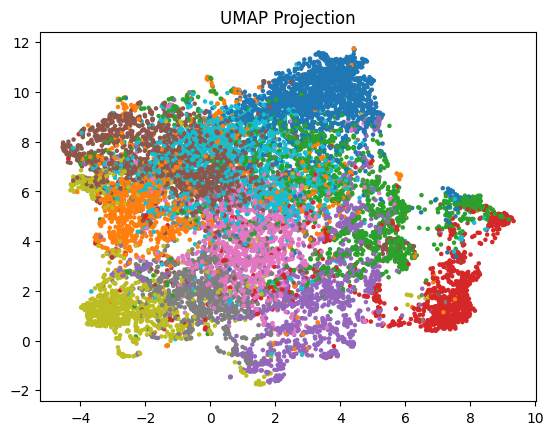

In [6]:
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.2,n_components=2,metric="cosine")
embedding = umap_model.fit_transform(action_vectior_df)


# UMAP reduce 100dim to 2dim
# Visualization of action vectors: 
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], s=5, c=actions_df["colors"])
plt.title('UMAP Projection')
plt.show()

### Figure 8

Similarity matrix of 10 centroids 

In [7]:
# load centroids vector
centroids_df = pd.read_csv(r".\data\code_book\CodeBook_k10.csv",index_col=0)
centroids_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.057539,0.049430,-0.096436,-0.162161,0.078181,0.051296,-0.066303,0.018063,0.006193,0.021947,...,-0.066222,-0.066915,0.086813,0.095231,-0.011877,0.131052,0.024845,0.172588,0.016220,0.025282
1,-0.003388,0.019250,-0.084032,-0.154240,0.049678,0.085532,0.012032,0.080948,0.019529,-0.061145,...,-0.022758,-0.086143,0.061949,0.113750,0.020382,0.111760,0.021425,0.067347,-0.024645,0.023021
2,0.013217,0.033101,-0.076624,-0.149672,0.078417,0.103948,-0.083732,0.067831,0.000002,0.010991,...,-0.043115,-0.078992,0.047271,0.092798,0.031135,0.141485,0.005101,0.166465,0.032732,-0.006844
3,0.050413,-0.046590,-0.165869,-0.110006,0.079796,0.172832,-0.041788,0.053204,0.116335,0.020597,...,-0.008864,-0.150288,0.076906,0.062860,0.035118,0.151247,-0.016998,0.133604,-0.035996,0.035871
4,0.084085,0.021870,-0.164910,-0.171275,0.131720,0.149076,-0.047660,0.050450,0.020582,-0.059928,...,-0.019517,-0.087442,-0.012451,0.050879,0.006705,0.150565,-0.006603,0.116768,-0.018317,0.045174
5,-0.014383,0.038821,-0.047829,-0.112484,0.027590,0.055031,-0.018130,0.016497,0.007136,-0.003290,...,-0.010966,-0.058428,0.076021,0.050834,-0.007511,0.029694,0.017599,0.070881,0.014755,0.000269
6,0.022570,0.018911,-0.147943,-0.177564,0.076015,0.138598,-0.069377,0.023863,-0.009794,-0.009669,...,0.028099,-0.093919,0.034876,0.014163,0.004931,0.046666,-0.044510,0.040667,0.024077,-0.001841
7,0.044845,0.043654,-0.117668,-0.138557,0.056746,0.109090,-0.009277,0.021045,-0.025824,-0.006481,...,0.045525,0.030812,-0.005693,-0.023637,-0.012738,0.108407,-0.030994,0.089976,-0.011171,0.005579
8,-0.001210,0.017282,-0.054474,-0.037307,0.037302,0.114489,-0.074680,0.032761,0.061926,0.003254,...,-0.038488,-0.058018,0.036870,0.029996,0.026395,0.141885,-0.049962,0.106675,-0.025501,0.033653
9,0.001455,0.066795,-0.067191,-0.123528,0.094183,0.109344,-0.048471,0.075244,0.044731,-0.006603,...,-0.001038,-0.072387,0.099442,0.059960,0.012944,0.085764,0.044556,0.094440,-0.006889,-0.000174


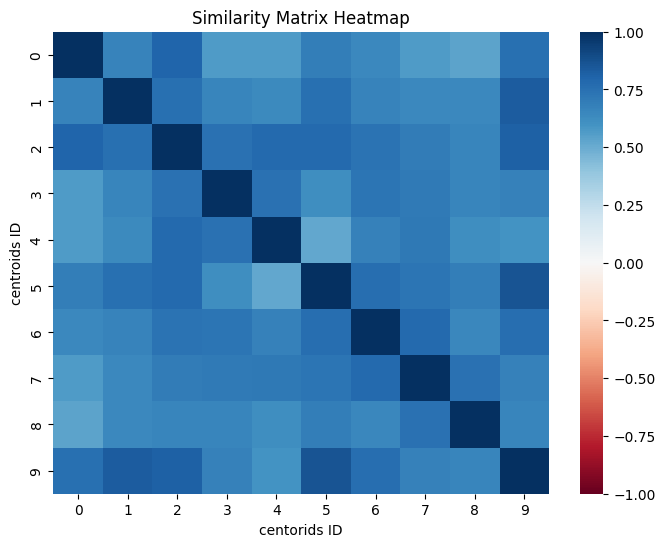

In [8]:
similarity_matrix = cosine_similarity(centroids_df)
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=False, cmap='RdBu',vmin=-1, vmax=1,xticklabels=centroids_df.index, yticklabels=centroids_df.index)
plt.title('Similarity Matrix Heatmap')
plt.xlabel('centorids ID')
plt.ylabel('centroids ID')
plt.show()

### Table 9

In [9]:
c0_df = actions_df[actions_df["cluster"]==0]
c0_df

,action,cluster,colors
0,Om NsNm PPsGNm Nm Nm Nl,0,#1f77b4
1,NNsPNsNNsNmNmNm_ Nm Nm NsNsNm Nm NmNm NsPsNmPP...,0,#1f77b4
2,NmPmNmPl,0,#1f77b4
27,OsPNm NmNNNPmPsPPsNm_ NPsGsNPsNsNsPm_ Nm Nm Nm...,0,#1f77b4
28,NmNm Em Nm Nm Nl,0,#1f77b4
...,...,...,...
13975,Nm NsNmNsPl,0,#1f77b4
13992,Nm PPsPsNNNsNPPl,0,#1f77b4
13994,Nm PPsPNsNNOsNNsNl,0,#1f77b4
13996,OsNsNm ONsNsNsNsNsNsNs_ Nm NsNNNNl,0,#1f77b4


In [10]:
c4_df = actions_df[actions_df["cluster"]==4]
c4_df

,action,cluster,colors
9,OsC,4,#9467bd
13,OsJm Pl,4,#9467bd
14,Cl,4,#9467bd
17,OsNNsNsNNm Cl,4,#9467bd
21,OsNsNNNNNNl,4,#9467bd
...,...,...,...
13960,OsNsNsNsNsNm PNl,4,#9467bd
13990,ONmCsOl,4,#9467bd
14000,NmNsNsNm OsNsNl,4,#9467bd
14003,OsOsCNl,4,#9467bd


In [11]:
c8_df = actions_df[actions_df["cluster"]==8]
c8_df

,action,cluster,colors
4,OsNNNNNNNNNNNN_ NNNNNNl,8,#bcbd22
8,OsNNNNNNNNNNNm_ NNNNNNNNNPPsC,8,#bcbd22
18,OsNsNNNNNNNNNN_ NNNNNNNNNNNNNN_ NNNNNNNNNNNNNN...,8,#bcbd22
24,OmNmNsNNNNsNNN_ NsNsNm NNNNNNNNNNNNNN_ NNNNNm ...,8,#bcbd22
25,OsNNsNNNNNNNNN_ NNNNNNNsNNNsNs_ NNNNNNmNNNNNNs...,8,#bcbd22
...,...,...,...
13896,ONsNNNNNNNNNNs_ NPNNsPmAAsAm AmAmCm OsNNNNNNNN...,8,#bcbd22
13911,OsNNsNNNNNNNPNs_ PsC,8,#bcbd22
13971,OsNNNNNNNNNNNN_ NsNsP,8,#bcbd22
13979,ONNNNNNNsNsJl,8,#bcbd22
